Fenomenos de Transporte II - EQ641 - Trabalho

Docentes:
Prof. Dr. Dirceu Noriler

PED: Éricles Nascimento

Discentes:
Davi Freitas RA: 252220

Felipe Lobão Melara RA: 247844

Pedro Henrique Kenzo Nishimoto RA: 176711

Wilson Santos Neto RA: 186542

Problema 1: Processamento térmico de um aço



a) Desenvolva e apresente o perfil de temperatura da peça. Apresente todas as
considerações necessárias.

Segue perfil de temperatura

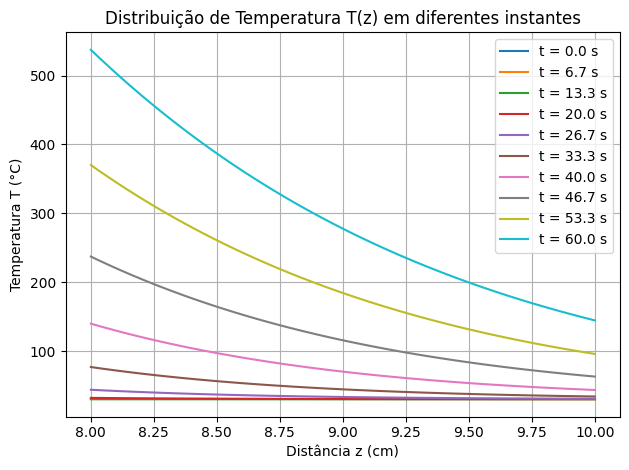

T(z=0.09 m, t=30 s) = 37.42 °C


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc  # Função erro complementar
from matplotlib.ticker import FuncFormatter # Deixar o eixo y no gráfico ajustado

# Parâmetros
q_sup = 4e7           # Fluxo de calor na superfície, W/m²
alfa = 12.85e-6       # Difusividade térmica, m²/s
k = 47.55             # Condutividade térmica, W/m·K
Ti = 30.0             # Temperatura inicial, °C

def T_calc(z,t,q_sup,alfa,k,Ti):

  if t == 0:
    return Ti * np.ones_like(z) #Impõem a temperatura inicial, fazendo T = Ti . 1

  else:
    termo_1 = (2 * q_sup / k) * np.sqrt(alfa * t / np.pi) * np.exp(-z**2 / (4 * alfa * t))
    termo_2 = (q_sup * z / k) * erfc(z / (2 * np.sqrt(alfa * t)))
    return Ti + termo_1 - termo_2

def Plotar(z,t_curvas,q_sup,alfa,k,Ti):
  plt.figure()

  for t in t_curvas:
    plt.plot(z*100, T_calc(z,t,q_sup,alfa,k,Ti), label=f't = {t:.1f} s') #Passando z para cm

  plt.xlabel('Distância z (cm)')
  plt.ylabel('Temperatura T (°C)')
  plt.title("Distribuição de Temperatura T(z) em diferentes instantes")
  plt.legend(loc='best')
  plt.grid(True)
  from matplotlib.ticker import FuncFormatter # Força o uso de valores absolutos no eixo Y
  plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}'))
  plt.tight_layout()
  plt.show()

  return 0

# Criando pontos no espaço (da placa)
z = np.linspace(0.08, 0.10, 100)  # de 0.8 a 0.1 m (de 8 cm a 10 cm)
# Determinando tempos para criar curvas (10 curvas de 0 a 60 s)
t_curvas = np.linspace(0, 60, 10)

Plotar(z,t_curvas,q_sup,alfa,k,Ti)

z0 = 0.09
t0 = 30
T_z0_t0 = T_calc(z0,t0,q_sup,alfa,k,Ti)
print(f"T(z=0.09 m, t=30 s) = {T_z0_t0:.2f} °C")

1. b) Desenvolvendo dois casos:

 Caso 1 - Usando q''=8.10^8 W/mK

 Caso 2 - Alcançando a zona temperada em 1 minuto


In [ ]:
from scipy.optimize import fsolve

# Caso 1:
q_sup = 8e8           # Fluxo de calor na superfície, W/m²

def caso_1(x):
  return 400 - T_calc(z0,x[0],q_sup,alfa,k,Ti)

solucao_caso_1 = fsolve(caso_1, [30])

t_caso_1 = solucao_caso_1[0]

print(f"Com um fluxo de calor na superfície de 8.10^8 W/m^2, o processo deve prosseguir por: {t_caso_1:.4f} s")

#Printar o gráfico, apenas para conferir se aparenta estar correta a resposta:
#t_curvas = np.linspace(0, 35, 10)
#Plotar(z,t_curvas,q_sup,alfa,k,Ti)

#Caso 2:
t_caso_2 = 60

def caso_2(x):
  return 400 - T_calc(z0,t_caso_2,x[0],alfa,k,Ti)

solucao_caso_2 = fsolve(caso_2, [10**8])

q_caso_2 = solucao_caso_2[0]

print(f"Com um fluxo de calor na superfície de {q_caso_2:.4f} W/m^2, o processo deve prosseguir por 60 s")

Com um fluxo de calor na superfície de 8.10^8 W/m^2, o processo deve prosseguir por: 34.7690 s
Com um fluxo de calor na superfície de 59751830.5153 W/m^2, o processo deve prosseguir por 60 s


1. Observações:

Cálculo pelo modelo inicial (o mesmo empregado na 1. a) e 1. b)) nas regiões da placa mais próximas da superfície

Cálculo de intervalo de validade do modelo empregado

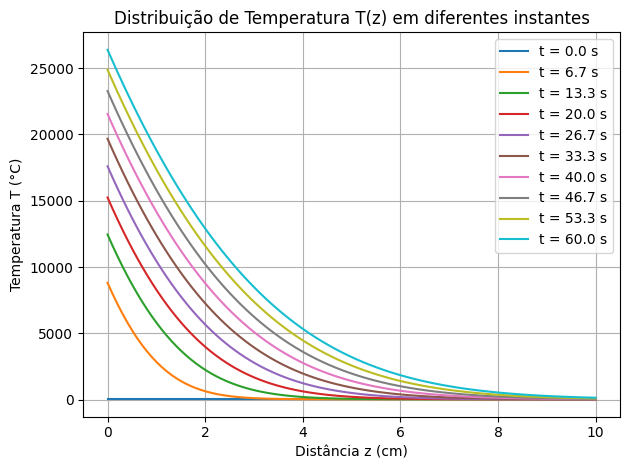

Considerando uma placa de 10 cm, o tempo experimental limite será de 58.4 s
Considerando uma placa de 50 cm, o tempo experimental limite será de 1459.1 s
Considerando uma placa de 50 cm, o tempo experimental limite será de 5836.6 s


In [ ]:
#Plotando oque o modelo de sólido semi-infinito prevê da superfície até a região de interesse:

q_sup = 4e7           # Fluxo de calor na superfície, W/m², Retornando o valor usado originalmente
L = 0.10              # Comprimento considerado da placa, m

# Criando pontos no espaço (da placa)
z = np.linspace(0.00, L, 100)  # de 0 a 0.1 m (da superfície até 10 cm)
# Determinando tempos para criar curvas (10 curvas de 0 a 60 s)
t_curvas = np.linspace(0, 60, 10)

Plotar(z,t_curvas,q_sup,alfa,k,Ti)

def t_l (L, alfa):
  return 0.075 * L**2/alfa   # Tempo experimental limite

t_L_10cm = t_l(0.10, alfa)
t_L_50cm = t_l(0.50, alfa)
t_L_100cm = t_l(1.00, alfa)
print(f"Considerando uma placa de 10 cm, o tempo experimental limite será de {t_L_10cm:.1f} s")
print(f"Considerando uma placa de 50 cm, o tempo experimental limite será de {t_L_50cm:.1f} s")
print(f"Considerando uma placa de 50 cm, o tempo experimental limite será de {t_L_100cm:.1f} s")

Problema 2: Transferência de calor bidimensional

a) Determine o coeficiente de convecção médio do ar sobre as aletas.

In [ ]:
import numpy as np

T_Parede = 363.15  # Temperatura da parede (K)
T_Fluido = 298.15  # Temperatura do fluido (K)
D = 2.5            # Diâmetro (m)

# Temperaturas conhecidas
T = np.array([300, 350])  # em Kelvin

# Propriedades nos pontos conhecidos
rho = np.array([1.1614, 0.995])            # kg/m³
Cp = np.array([1.007, 1.009])              # kJ/kg.K
mu = np.array([184.6, 208.2]) * 1e-7       # N.s/m²
nu = np.array([15.89, 20.92]) * 1e-6       # m²/s
k = np.array([26.3, 30.0]) * 1e-3          # W/m.K


alpha = np.array([22.5, 29.9]) * 1e-3       # m²/s
Pr = np.array([0.707, 0.700])              # adimensional

# Temperatura de interpolação
T_interp = 330.65

# Interpolações
rho_interp = np.interp(T_interp, T, rho)
Cp_interp = np.interp(T_interp, T, Cp)
mu_interp = np.interp(T_interp, T, mu)
nu_interp = np.interp(T_interp, T, nu)
k_interp = np.interp(T_interp, T, k)
alpha_interp = np.interp(T_interp, T, alpha)
Pr_interp = np.interp(T_interp, T, Pr)

# Cálculo de β e Grashof
Beta = 1 / T_interp
Gr = (9.81 * Beta * (T_Parede - T_Fluido) * D**3) / nu_interp**2
Ra = Gr*Pr_interp
NuD_médio = 0.125*Ra**0.333
h_médio = NuD_médio*k_interp/D

# Exibindo os resultados
print(f"Para T = {T_interp} K:")
print(f"Densidade (ρ) = {rho_interp:.4f} kg/m³")
print(f"Calor específico (Cp) = {Cp_interp:.4f} kJ/kg.K")
print(f"Viscosidade dinâmica (μ) = {mu_interp:.8f} N.s/m²")
print(f"Viscosidade cinemática (ν) = {nu_interp:.8f} m²/s")
print(f"Condutividade térmica (k) = {k_interp:.4f} W/m.K")
print(f"Condutividade de expansão (α) = {alpha_interp:.8f} m²/s")
print(f"Número de Prandtl (Pr) = {Pr_interp:.4f}")
print(f"Coeficiente de expansão térmica β = {Beta:.6f} 1/K")
print(f"Número de Grashof (Gr) = {Gr:.4e}")
print(f"Número de Rayleigh (Ra) = {Ra:.4e}")
print(f"Número de Nusselt médio (Nu_D) = {NuD_médio:.4f}")
print(f"Coeficiente de convecção médio (h) = {h_médio:.4f} W/m².K")

Para T = 330.65 K:
Densidade (ρ) = 1.0594 kg/m³
Calor específico (Cp) = 1.0082 kJ/kg.K
Viscosidade dinâmica (μ) = 0.00001991 N.s/m²
Viscosidade cinemática (ν) = 0.00001897 m²/s
Condutividade térmica (k) = 0.0286 W/m.K
Condutividade de expansão (α) = 0.02703620 m²/s
Número de Prandtl (Pr) = 0.7027
Coeficiente de expansão térmica β = 0.003024 1/K
Número de Grashof (Gr) = 8.3704e+10
Número de Rayleigh (Ra) = 5.8819e+10
Número de Nusselt médio (Nu_D) = 482.1254
Coeficiente de convecção médio (h) = 5.5094 W/m².K


Problema 3: Transferência de calor em um reator milimétrico



Determinação do perfil do Caso Base:

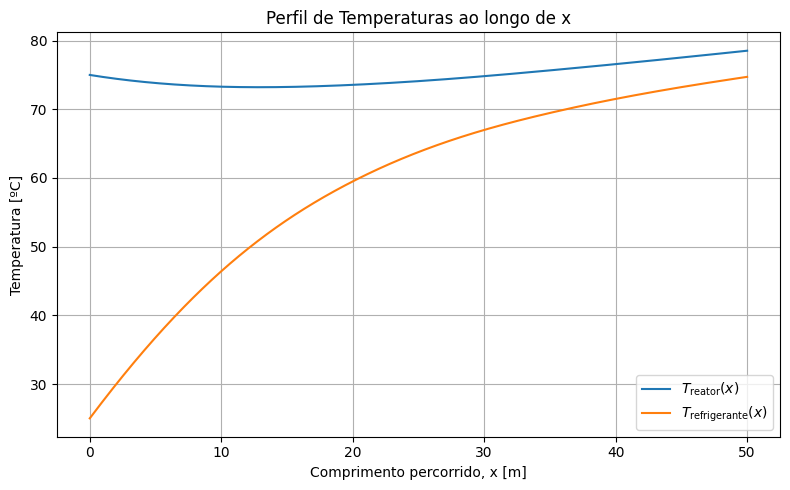

Tabela de temperaturas (caso base):
 x [m]  T_reator [°C]  T_refrigerante [°C]
   0.0      75.000000            25.000000
   2.0      74.444358            29.944070
   4.0      74.004966            34.578277
   6.0      73.671934            38.876559
   8.0      73.436348            42.823526
  10.0      73.289183            46.413576
  12.0      73.221309            49.650895
  14.0      73.223485            52.549454
  16.0      73.286360            55.133015
  18.0      73.400476            57.435122
  20.0      73.556469            59.497989
  22.0      73.748649            61.351390
  24.0      73.974325            63.010449
  26.0      74.230561            64.491366
  28.0      74.514071            65.811962
  30.0      74.821219            66.991689
  32.0      75.148017            68.051622
  34.0      75.490127            69.014460
  36.0      75.842861            69.904532
  38.0      76.203743            70.736997
  40.0      76.573979            71.510086
  42.0      76.952

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Cálculo de propriedades

# Observação para todas as propriedades abaixo, deve-se usar T em graus Celcius

def rho(T): # Densidade da água, kg / m^3
  if T < 0:
# Inserimos estas condições para T < 0 e T > 0 porque durante a interação do Runge Kutta ele tentava para valores de T nestas faixas, eventualmente
# dando valores negativos para estas 4 propriedades, e quebrando a convergência. Assim, não geramos nenhum gráfico que passe de 100ºC também por
# perder o sentido físico, já que haveria evaporação, oque seria um problema/imprevisto se fosse real (além de que neste caso mudaria a modelagem)
    return rho(0)
  elif T <= 100:
    return 9.99864928e2 + 5.72357369e-2 *T -7.96007024e-3 *T**2 + 5.32777547e-5 *T**3 -2.6032268e-7 *T**4 + 5.11178237e-10 *T**5 # Testado, para 25º C: 997.0565458677833, para 75º C: 974.8350435525684
  else:
    return rho(100)

def mu(T): # Viscosidade dinâmica, Pa . s
  if T < 0:
    return mu(0)
  elif T <= 100:
    return 0.116947 -0.00100532 *(T+273.15) + 2.90283e-6 *(T+273.15)**2 -2.80572e-9 *(T+273.15)**3
  # Aqui usei (T+273.15 ao invés de T, uma vez que apenas esta expressão encontrada na literatura usa a temperatura expressa em Kelvin)
  else:
    return mu(100)

def Cp(T): # Capacidade calorífica, J/kg K
  if T < 0:
    return Cp(0)
  elif T <= 100:
    return 4.2192e3 - 3.2972e0*T + 1.0407e-1 *T**2 - 1.5591e-3 *T**3 + 9.8933e-6 *T**4 # Testado, para 25º C: 4181.3173828125, para 75º C: 4212.5886328125
  else:
    return Cp(100)

def k(T): # Condutividade térmica, W/m K
  if T < 0:
    return k(0)
  elif T <= 100:
    return 5.6108e-1 + 1.8900e-3 *T + 2.6531e-6 *T**2 - 2.0865e-7 *T**3 + 1.1942e-9 *T**4 # Testado, para 25º C: 0.607194515625, para 75º C: 0.667514703125
  else:
    return k(100)

# Cálculo de adimensionais ou variáveis

def Red_D (rho, v_m, D_hm, mu): # Calcula o Número de Reynolds
  return rho * v_m * D_hm / mu

def Pr(mu, Cp, k): # Calcula o Número de Prandtl
  return mu * Cp / k

def Nu_D_DB (Re_D, Pr): #Número de Nusselt pela equação de Dittus-Boelter (DB), onde o fluido está com Tm < Ts
  return 0.023 * Re_D**0.8 * Pr**0.4

def h (Nu, k, D_h): # Determina o coeficiente de convecção apartir do número de Nusselt
  return Nu * k / D_h

def Vaz_mas (Vaz_vol, T): # Determina a Vazão mássica
  return Vaz_vol * rho (T)

# Código para definição das equações a serem integradas/resolvidas para cada caso
def dTdx(x, y):
    # Definições
    T_rea, T_refri = y
    h_rea = h(Nu_rea, k(T_rea), D_h_rea) # Coeficiente de convecção do reator
    Re_refri = Red_D(rho(T_refri), v_m_refri, D_h_refri, mu(T_refri))
    Pr_refri = Pr(mu(T_refri), Cp(T_refri), k(T_refri))
    Nu_refri = Nu_D_DB(Re_refri, Pr_refri)
    h_refri = h(Nu_refri, k(T_refri), D_h_refri) # Coeficiente de convecção do refrigerante
    # Derivadas
    dT_rea_dx   = (P_rea   * h_rea * (T_refri - T_rea)   / (Vaz_mas (Vaz_vol_rea, T_rea)   * Cp(T_rea))) + (q_rea * A_rea) / (Vaz_mas (Vaz_vol_rea, T_rea)   * Cp(T_rea))
    dT_refri_dx = P_refri * h_refri * (T_rea   - T_refri) / (Vaz_mas (Vaz_vol_refri, T_refri) * Cp(T_refri))
    return [dT_rea_dx, dT_refri_dx]

# Plota o gráfico no primeiro caso
def Plotar (sol):
  plt.figure(figsize=(8,5))
  plt.plot(sol.t, sol.y[0], label=r'$T_{\rm reator}(x)$')
  plt.plot(sol.t, sol.y[1], label=r'$T_{\rm refrigerante}(x)$')
  plt.xlabel('Comprimento percorrido, x [m]')
  plt.ylabel('Temperatura [ºC]')
  plt.title('Perfil de Temperaturas ao longo de x')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

def Resolver (C, T0, x): # Resolve as duas equações ao mesmo tempo, usando Método de Runge-Kutta de 4ª Ordem
  return solve_ivp(dTdx, (0, C), T0, t_eval=x, method='RK45')

# Parâmetros do fluido reacional
C = 50   # Comprimento, m
L_rea = 0.02 # Largura, m
H_rea = 0.01 # Altura, m
q_rea = 1e6 # Taxa de geração de calor, W/m^3
Vaz_vol_rea = 2e-4 # Vazão volumétrica, m^3/s
T0_rea = 75 # Temperatura de entrada, ºC
Nu_rea= 3.02 # Número de Nussel para 4 paredes finas condutoras em fluxo completamente desenvolvido em duto retangular
P_rea = 2 * L_rea + 2 * H_rea # Perímetro molhado do fluido refrigerante, m
A_rea = L_rea * H_rea # Área de uma seção transversal, m^2
D_h_rea = 4 * A_rea / P_rea # Diâmetro hidraulico, m

# Parâmetros do fluido refrigerante
D_refri = 0.04 # Diâmetro, m
T0_refri = 25 # Temperatura de entrada, ºC
P_molhado_refri = P_rea + np.pi * D_refri # Perímetro molhado do fluido refrigerante (PARA O CÁLCULO DO DIÂMETRO HIDRAULICO APENAS), m
A_refri = np.pi * (D_refri/2)**2 - A_rea
D_h_refri = 4*A_refri/P_molhado_refri # Diâmetro hidraulico, m
Vaz_vol_refri = 2e-3 # Vazão volumétrica, m^3/s
v_m_refri = Vaz_vol_refri / A_refri # Velocidade média, m/s
P_refri = P_rea # Perímetro do fluido refrigerante (APENAS O INTERNO), m

# Discretizando 1000 pontos ao longo do escoamento
x = np.linspace(0, C, 1000)  # de 0 a 50 m (5 cm de distancia entre cada ponto)
T0 = [T0_rea, T0_refri]

# Resolução (Caso base)
sol = Resolver (C, T0, x)

# Plot dos resultados (Caso base)
Plotar(sol)

# Criação de Tabela de temperaturas a cada 2m
x_tab = np.arange(0, C+1e-6, 2) # Este x a cada 2 m que será usado para mostrar os valores das tabelas
sol_tab = Resolver(C, T0, x_tab)
df = pd.DataFrame({
    'x [m]': sol_tab.t,
    'T_reator [°C]': sol_tab.y[0],
    'T_refrigerante [°C]': sol_tab.y[1]
})
print('Tabela de temperaturas (caso base):')
# Printando tabela do caso base
print(df.to_string(index=False))

Variando as propriedades:

Tabela de temperaturas, T0_rea = 25.0 ºC
 x [m]  T_reator [°C]  T_refrigerante [°C]
   0.0      25.000000            25.000000
   2.0      25.475205            25.023448
   4.0      25.942174            25.089377
   6.0      26.402388            25.189506
   8.0      26.856317            25.322071
  10.0      27.304320            25.485907
  12.0      27.746798            25.679472
  14.0      28.184191            25.900849
  16.0      28.616979            26.147743
  18.0      29.045683            26.417484
  20.0      29.470863            26.707026
  22.0      29.893121            27.012944
  24.0      30.313097            27.331441
  26.0      30.731472            27.658340
  28.0      31.148949            27.989232
  30.0      31.565295            28.326411
  32.0      31.980240            28.672209
  34.0      32.393892            29.026173
  36.0      32.806363            29.387788
  38.0      33.217777            29.756479
  40.0      33.628265            30.131611
  42.0      3

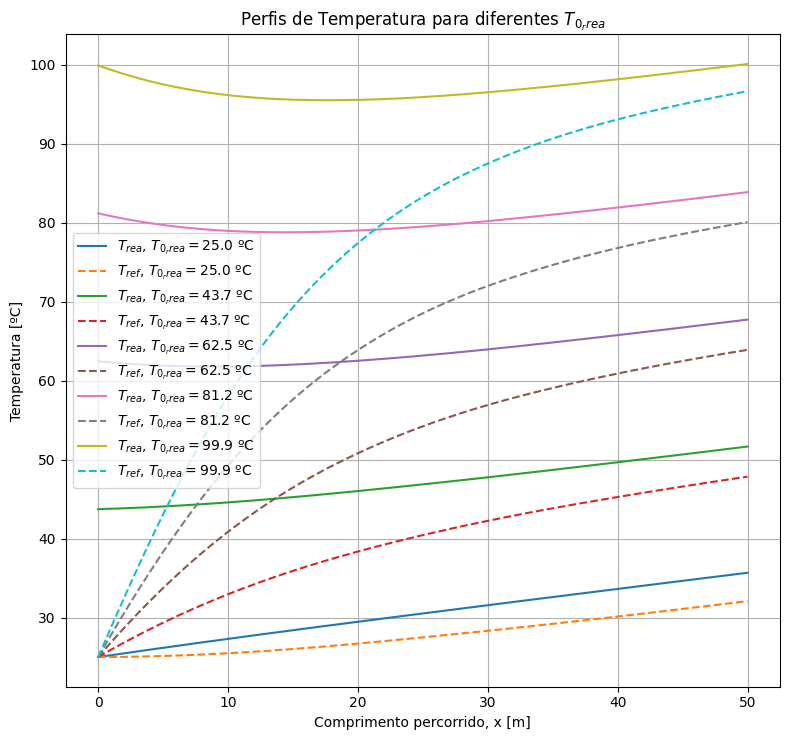

Tabela de temperaturas, q_rea = 0.0 MW/m³
 x [m]  T_reator [°C]  T_refrigerante [°C]
   0.0      75.000000            25.000000
   2.0      73.962768            29.918928
   4.0      73.051453            34.476473
   6.0      72.254774            38.648982
   8.0      71.562734            42.425375
  10.0      70.965276            45.804442
  12.0      70.452275            48.794843
  14.0      70.013545            51.415111
  16.0      69.638836            53.693644
  18.0      69.317831            55.668716
  20.0      69.040584            57.386482
  22.0      68.801561            58.878196
  24.0      68.597540            60.163157
  26.0      68.425073            61.261250
  28.0      68.280468            62.193129
  30.0      68.159794            62.980219
  32.0      68.058876            63.644711
  34.0      67.973300            64.209567
  36.0      67.898507            64.698167
  38.0      67.833578            65.120038
  40.0      67.778382            65.479404
  42.0      

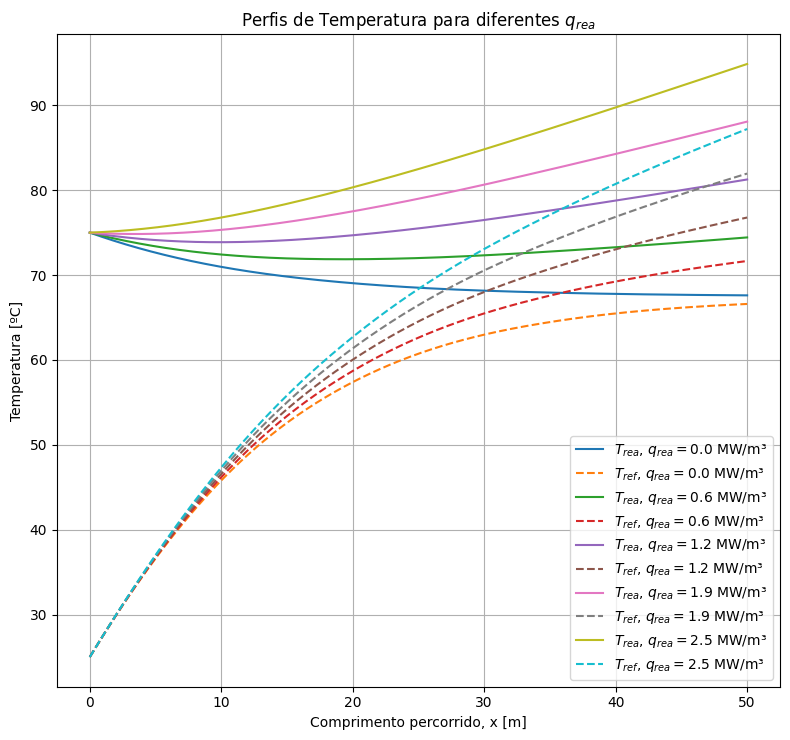

Tabela de temperaturas, Vaz_vol_rea = 20.0 mL/s
 x [m]  T_reator [°C]  T_refrigerante [°C]
   0.0      75.000000            25.000000
   2.0      69.982913            29.694819
   4.0      66.822168            33.716735
   6.0      65.064618            37.195456
   8.0      64.338861            40.248161
  10.0      64.286575            42.994528
  12.0      64.741492            45.510879
  14.0      65.593154            47.847681
  16.0      66.721412            50.059473
  18.0      68.029859            52.193106
  20.0      69.489703            54.262546
  22.0      71.072322            56.281142
  24.0      72.738392            58.269155
  26.0      74.446450            60.249032
  28.0      76.194917            62.220776
  30.0      77.985632            64.181836
  32.0      79.812911            66.134578
  34.0      81.664175            68.085981
  36.0      83.521247            70.046855
  38.0      85.383977            72.017104
  40.0      87.260018            73.991400
  42.0

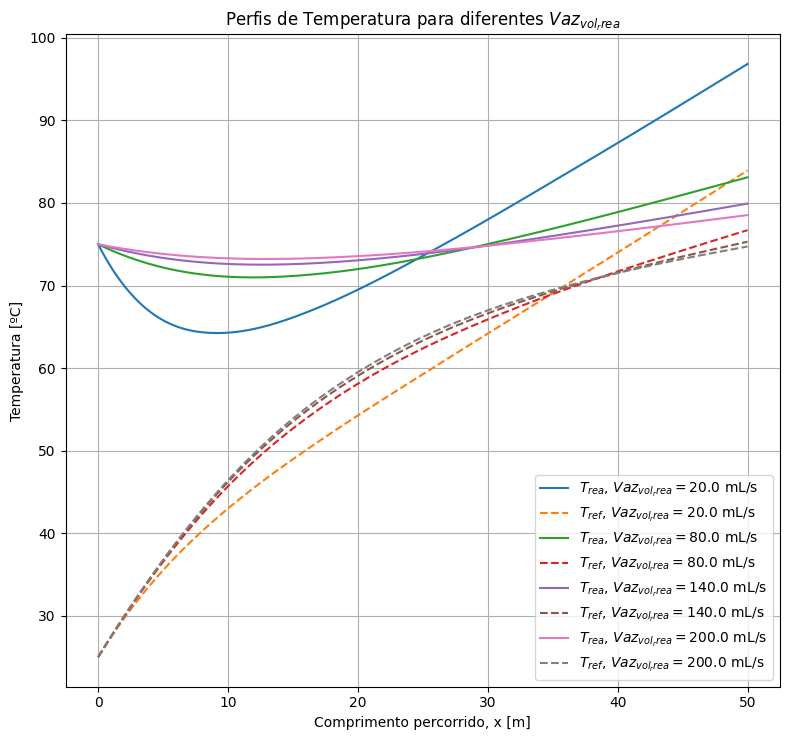

In [ ]:
#Valores de T0_rea para serem empregados/variados
T0_rea_lista = np.linspace(25, 99.9, 5)

#Plotar para T0_rea variando
plt.figure(figsize=(8,7.5))
for T0_rea in T0_rea_lista:
    T0 = [T0_rea, T0_refri]
    sol = Resolver(C, T0, x)
    plt.plot(sol.t, sol.y[0], label=f'$T_{{rea}}$, $T_{{0_rrea}}={T0_rea:.1f}$ ºC')
    plt.plot(sol.t, sol.y[1], '--', label=f'$T_{{ref}}$, $T_{{0_rrea}}={T0_rea:.1f}$ ºC')
    sol_tab = Resolver(C, T0, x_tab)
    df = pd.DataFrame({
    'x [m]': sol_tab.t,
    'T_reator [°C]': sol_tab.y[0],
    'T_refrigerante [°C]': sol_tab.y[1]
    })
    print(f'Tabela de temperaturas, T0_rea = {T0_rea:.1f} ºC')
    print(df.to_string(index=False))

plt.xlabel('Comprimento percorrido, x [m]')
plt.ylabel('Temperatura [ºC]')
plt.title('Perfis de Temperatura para diferentes $T_{0_rrea}$')
plt.grid(True)
plt.legend(fontsize='medium', loc='best')
plt.tight_layout()
plt.show()

# Voltar o valor dado de T0_rea ao do caso base
T0_rea = 75 # Temperatura de entrada, ºC
T0 = [T0_rea, T0_refri]

#Valores de q_rea para serem empregados/variados
q_rea_lista = np.linspace(0, 2.5e6, 5)

#Plotar para q_rea variando
plt.figure(figsize=(8,7.5))
for q_rea in q_rea_lista:
    sol = Resolver(C, T0, x)
    plt.plot(sol.t, sol.y[0], label=f'$T_{{rea}}$, $q_{{rea}}={q_rea*1e-6:.1f}$ MW/m³')
    plt.plot(sol.t, sol.y[1], '--', label=f'$T_{{ref}}$, $q_{{rea}}={q_rea*1e-6:.1f}$ MW/m³')
    sol_tab = Resolver(C, T0, x_tab)
    df = pd.DataFrame({
    'x [m]': sol_tab.t,
    'T_reator [°C]': sol_tab.y[0],
    'T_refrigerante [°C]': sol_tab.y[1]
    })
    print(f'Tabela de temperaturas, q_rea = {q_rea*1e-6:.1f} MW/m³')
    print(df.to_string(index=False))

plt.xlabel('Comprimento percorrido, x [m]')
plt.ylabel('Temperatura [ºC]')
plt.title('Perfis de Temperatura para diferentes $q_{rea}$')
plt.grid(True)
plt.legend(fontsize='medium', loc='best')
plt.tight_layout()
plt.show()

# Voltar o valor dado de q_rea do caso base
q_rea = 1e6 # Taxa de geração de calor, W/m^3

#Valores de Vaz_vol_rea para serem empregados
Vaz_vol_rea_lista = np.linspace(2e-5, 2e-4, 4)

#Plotar para Vaz_vol_rea variando
plt.figure(figsize=(8,7.5))
for Vaz_vol_rea in Vaz_vol_rea_lista:
    sol = Resolver(C, T0, x)
    plt.plot(sol.t, sol.y[0], label=f'$T_{{rea}}$, $Vaz_{{vol_rrea}}={(Vaz_vol_rea*1e6):.1f}$ mL/s')
    plt.plot(sol.t, sol.y[1], '--', label=f'$T_{{ref}}$, $Vaz_{{vol_rrea}}={(Vaz_vol_rea*1e6):.1f}$ mL/s')
    sol_tab = Resolver(C, T0, x_tab)
    df = pd.DataFrame({
    'x [m]': sol_tab.t,
    'T_reator [°C]': sol_tab.y[0],
    'T_refrigerante [°C]': sol_tab.y[1]
    })
    print(f'Tabela de temperaturas, Vaz_vol_rea = {(Vaz_vol_rea*1e6):.1f} mL/s')
    print(df.to_string(index=False))

plt.xlabel('Comprimento percorrido, x [m]')
plt.ylabel('Temperatura [ºC]')
plt.title('Perfis de Temperatura para diferentes $Vaz_{vol_rrea}$')
plt.grid(True)
plt.legend(fontsize='medium', loc='best')
plt.tight_layout()
plt.show()

Plotando a mudança das propriedades da água com a temperatura (para conferência e comparação):

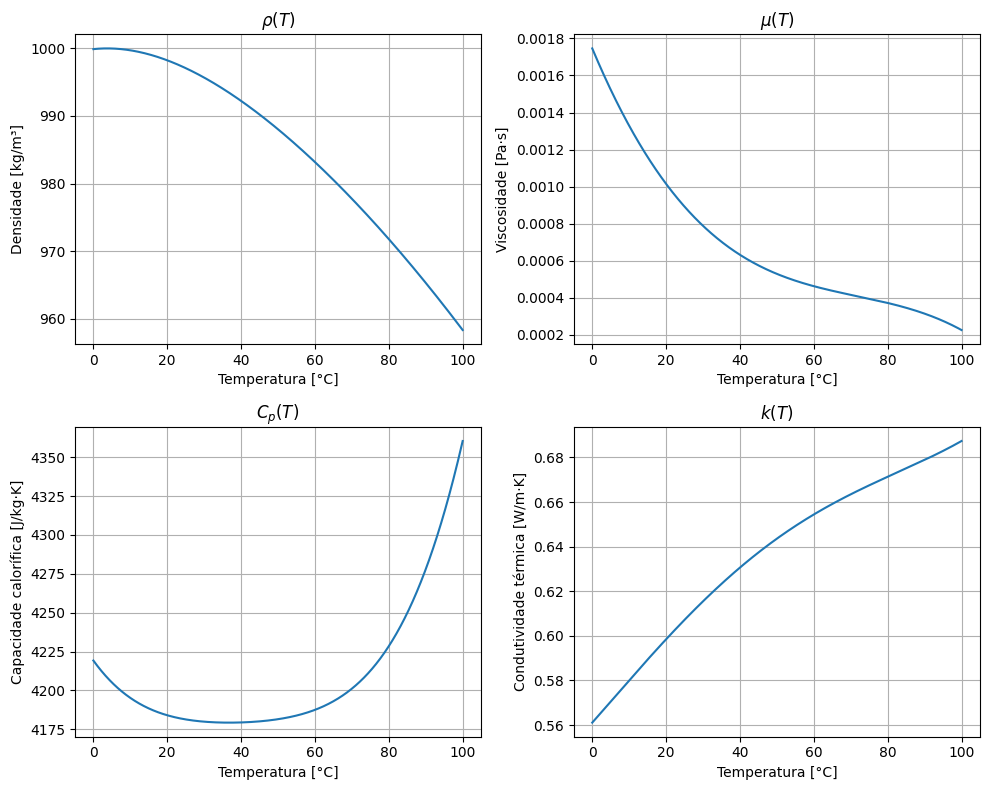

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

temperaturas = np.linspace(0, 100, 1000)
rho_valores = [rho(T) for T in temperaturas]
mu_valores = [mu(T) for T in temperaturas]
Cp_valores = [Cp(T) for T in temperaturas]
k_valores = [k(T) for T in temperaturas]

# Plotar os gráficos
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(temperaturas, rho_valores)
plt.xlabel('Temperatura [°C]')
plt.ylabel('Densidade [kg/m³]')
plt.title(r'$\rho(T)$')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(temperaturas, mu_valores)
plt.xlabel('Temperatura [°C]')
plt.ylabel('Viscosidade [Pa·s]')
plt.title(r'$\mu(T)$')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(temperaturas, Cp_valores)
plt.xlabel('Temperatura [°C]')
plt.ylabel('Capacidade calorífica [J/kg·K]')
plt.title(r'$C_p(T)$')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(temperaturas, k_valores)
plt.xlabel('Temperatura [°C]')
plt.ylabel('Condutividade térmica [W/m·K]')
plt.title(r'$k(T)$')
plt.grid(True)

plt.tight_layout()
plt.show()